<a href="https://colab.research.google.com/github/ienoiaa/ienoia/blob/master/DataScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
df = pd.read_csv("/content/tripadvisor_restaurants.csv")

In [52]:
# Remove Duplicate Entries
df.drop_duplicates(inplace=True)
print(df)

                                                 Name  Ratings  \
0                                  Chia Vegan Kitchen      4.9   
1                                        Veggie Pause      4.9   
2                 El Jardin - Healthy Food And Coffee      5.0   
3                                             Blu Bar      4.9   
4                                         Dapur Usada      4.9   
5                                              Vrutal      4.9   
6                                      Time Traveller      4.9   
7                                            Manna 68      4.8   
8                                  Koshary Abou Tarek      4.6   
9                                 BioMania Bistro Bol      4.9   
10            Ristorante Vegano Biologico La Lanterna      4.5   
11              Antica Casa Rava - (vegan restaurant)      4.9   
12                Katze Vegan & Vegetarian Restaurant      5.0   
13                                      Twelve Eatery      4.9   
14        

In [58]:
#Fill missing ratings with the mean or median rating.
df["Ratings"] = df["Ratings"].fillna(df["Ratings"].mean())
print(df)

#Drop rows with missing values if critical
df.dropna(inplace=True)
print(df)

#Ensure consistent casing for text columns (e.g., restaurant names, locations)
df["Name"] = df["Name"].str.lower()
df["Location"] = df["Location"].str.lower()
print(df)

#Get average, median, and mode of numeric columns like Rating and Review Count
average_rating = df["Ratings"].mean()
median_rating = df["Ratings"].median()
mode_rating = df["Ratings"].mode()[0]
print("\nAverage Rating:", average_rating)
print("\nMedian Rating:", median_rating)
print("\nMode Rating:", mode_rating)

#For example, group hotels or restaurants by Location and calculate the average rating for each
avg_rating_by_location = df.groupby("Location")["Ratings"].mean()
print("\nAverage Rating by Location:")
print(avg_rating_by_location)

                                                 Name  Ratings  \
0                                  chia vegan kitchen      4.9   
1                                        veggie pause      4.9   
2                 el jardin - healthy food and coffee      5.0   
3                                             blu bar      4.9   
4                                         dapur usada      4.9   
5                                              vrutal      4.9   
6                                      time traveller      4.9   
7                                            manna 68      4.8   
8                                  koshary abou tarek      4.6   
9                                 biomania bistro bol      4.9   
10            ristorante vegano biologico la lanterna      4.5   
11              antica casa rava - (vegan restaurant)      4.9   
12                katze vegan & vegetarian restaurant      5.0   
13                                      twelve eatery      4.9   
14        

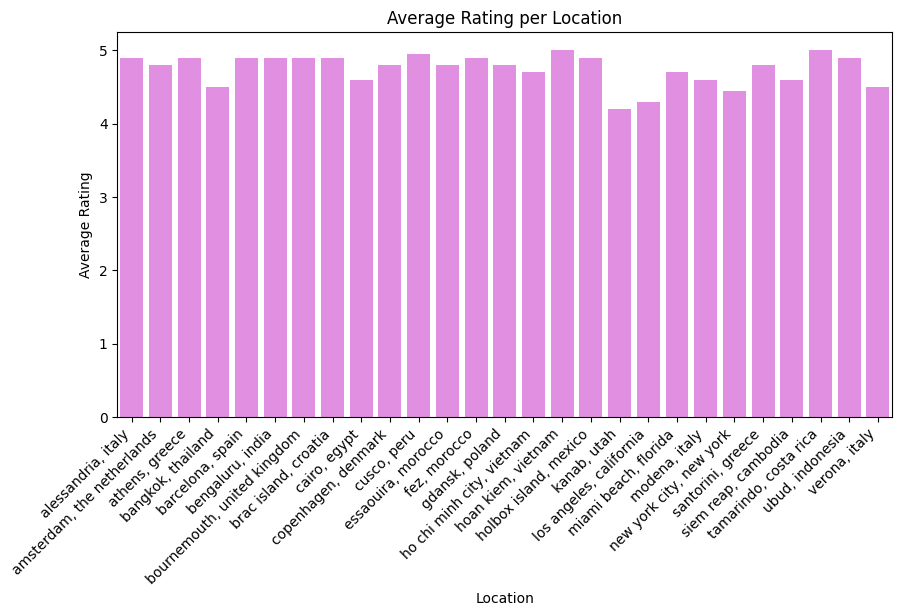

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rating_by_location.index, y=avg_rating_by_location.values, color="violet")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.title("Average Rating per Location")
plt.show()

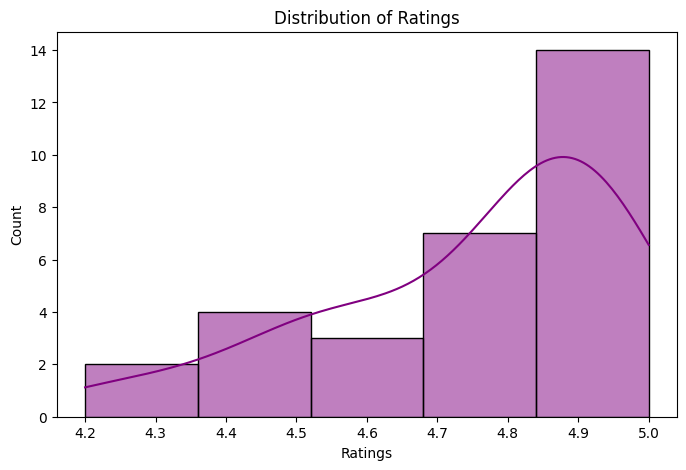

In [55]:
#Histogram: Plot the distribution of ratings.
plt.figure(figsize=(8, 5))
sns.histplot(df["Ratings"], bins=5, kde=True, color="purple")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()